# Palmer Penguin Project

***

This notebook contains my analysis of famous palmer penguin’s dataset. This repository focuses on the body mass of the penguin as the main parameter.

![image palmer penguins](https://www.gabemednick.com/post/penguin/featured_hu23a2ff6767279debab043a6c8f0a6157_878472_720x0_resize_lanczos_2.png)

Data is available on [GITHUB](https://allisonhorst.github.io/palmerpenguins/)


## Technical

This section cover all the technical needs to run the code of this repository. It is split in 2 areas:
*   Modules - Pandas, matplotlip and numpy are needed for this project
*   Palmer Penguins Dataset

#### Import modules

In [1]:

# Data frames
import pandas as pd
#Plotting
import matplotlib.pyplot as plt
#numerical arrays
import numpy as np

#### Upload dataset

In [2]:
# Using pd.reader_csv in pythong we can upload the data set
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

## Overview 

This section will be divided in 3 areas:
*   Quick overview of data calling the function
*   Data sumarry with basic statistics parameters
*   Type of data available in the dataset

In [3]:
# We use funcion name to have a quick look of the Palmer Penguins dataset
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


### Summary of the numbers


In [4]:
#Summarize the main statistics 
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


### Types

In [5]:
# This functions allow us to se the type of data which is contained in the dataset. 
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

## Visualization

This section will contain different analysis and graphs that will help to understand the current situation of the palmer penguin’s colony.

*   First thing we need to create variable and import numbers into NumPy
*   Composition of the colony - represented by a bar, pie and scatter charts
    *   Bar chart named **Number of penguins per specie**. 
    *   Pie chart named **Percentage of penguins per species**. 
    *   Bar and scatter chart named **Average penguin body mass by species**. 

*   Histogram





In [6]:
# Creating variables using numpy.
 
bill_length = df["bill_length_mm"].to_numpy()
bill_depth = df["bill_depth_mm"].to_numpy()
flipper_length = df["flipper_length_mm"].to_numpy()
body_mass = df["body_mass_g"].to_numpy()


### Composition of the colony

This section aims to analyse the composition of the Palmer Penguins colony based in species and the body weight. The section contains 3 charts.

The first bar chart called **Number of penguins per species** provide a clear view of the composition of the colony by species. The pie chart called **Percentage of penguins per species** shows the percentage of each penguin in the colony.

Finally, the graph called **Average penguin body mass by species** is a combination of a bar and scatter chart. This graph shows the average body mass per species. The scatter chart added on top shows the different weights per specie. As we can see Gentoo penguins are in average the larger penguin in the colony. 



Text(0.5, 1.0, 'Number of penguins per specie')

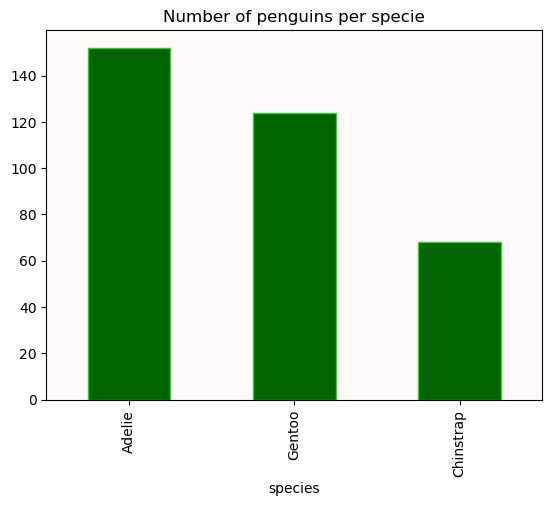

In [7]:
# This bar chart is creating using the parameter species. Species is an object and it cannot be directly used to create the barchart. Adding value count allow the system to create the bar chart.
number_of_penguins =df ["species"].value_counts().plot.bar(color="darkgreen",edgecolor="limegreen")
number_of_penguins.set_facecolor("snow")
plt.title("Number of penguins per specie")

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

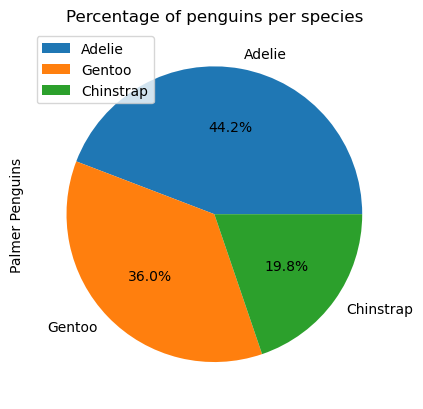

In [16]:
#Adding Value count to species allow to convert species in numbers and that’s allow the matplotlib to create the pie chart

df ["species"].value_counts().plot.pie(autopct='%1.1f%%')
plt.legend(loc="upper left")
plt.ylabel("Palmer Penguins")
plt.title("Percentage of penguins per species")

# This function shows the total number of penguins per specie
df ["species"].value_counts()

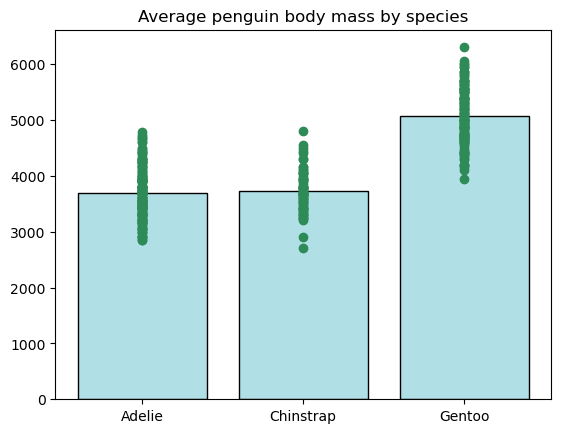

In [9]:
# This bar chart used  2 parameters. Species and body mass. Using groupby we can create groups of penguins and the mean give us teh average body mass.
penguins_grouped = df[['species', 'body_mass_g']].groupby('species').mean().reset_index()

plt.bar(penguins_grouped['species'], penguins_grouped['body_mass_g'], color="powderblue",edgecolor="black")
plt.title('Average penguin body mass by species')

# Adding the scatter plot shows us the range of body mass of each of the species. 
plt.scatter(df ["species"], df[ "body_mass_g"], color = "seagreen")

### Body weight representation and influence in the flipper length

(array([ 9., 25., 56., 54., 44., 36., 34., 26., 19., 22., 13.,  4.]),
 array([2700., 3000., 3300., 3600., 3900., 4200., 4500., 4800., 5100.,
        5400., 5700., 6000., 6300.]),
 <BarContainer object of 12 artists>)

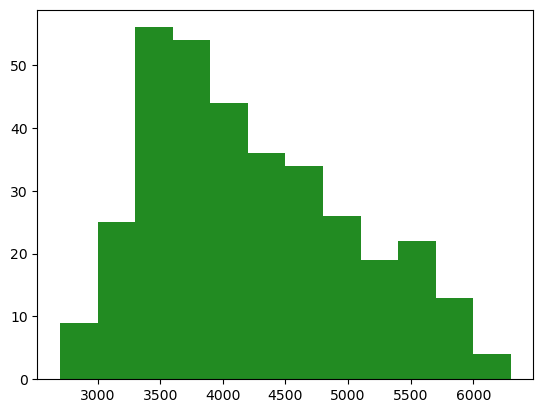

In [30]:
# This histagram shows the number of penguins per body mass. We can see that the majority of penguins falls between apporx 3200 and 4700. 
plt.hist(body_mass, bins= 12, color = "forestgreen")



## References

Text(0.5, 1.0, 'Palmer Penguins')

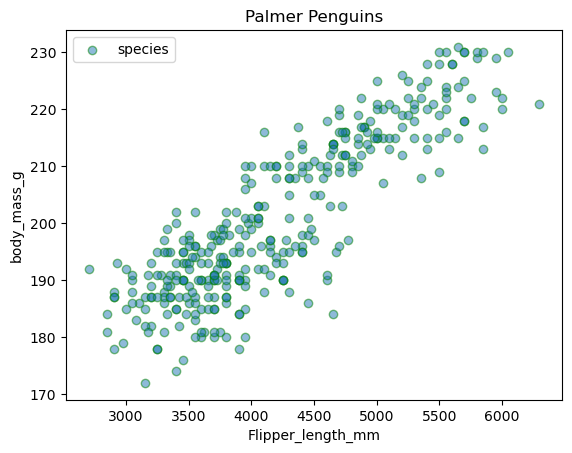

In [34]:
# Finally body mass correlation with flipper length

plt.scatter( body_mass, flipper_length, alpha=0.5, edgecolors='g', linewidths=1)
plt.legend(["species"])

plt.xlabel("Flipper_length_mm")
plt.ylabel("body_mass_g")
plt.title("Palmer Penguins")



### current volume and distribution of Palmer penguins by Species

# this will be big
under a header you can have paragraphs. under a header you can have paragraphs. under a header you can have paragraphs. under a header you can have paragraphs.under a header you can have paragraphs. under a header you can have paragraphs. under a header you can have paragraphs. under a header you can have paragraphs. under a header you can have paragraphs. under a header you can have paragraphs. under a header you can have paragraphs. under a header you can have paragraphs. 

If you want a *second* paragrahps leave a blank line, 

If you want a **second** paragrahps leave a blank line, 

If you want a second paragrahps leave a blank line, 
If you want a second paragrahps leave a blank line, 
If you want a second paragrahps leave a blank line, 
If you want a second paragrahps leave a blank line, 

## slightly smaller 

- Bullet
  -  second level 
- Point
- List

### slightly smaller 

1. number bullets
2. bullets

#### slightly smaller 
> let see the ouput
##### slightly smaller 
###### slightly smaller 



***

### END

## Tables
***


|Species   | Bill Length (mm) |Body Mass  (g)  |
|----------|------------------:|--------------:|
|Adelie    |               38.8|           3701|
|Chinstrap |               48.8|           3733|
|Gentoo    |               47.5|           5067|
